In [351]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
df_저 = pd.read_csv('data/어장환경관측자료(저층).csv')

In [352]:
font_path = "data/서울한강 장체EB.TTF"  # 실제 한글 폰트 파일 경로로 변경해야 합니다.
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [353]:
import pandas as pd

# 데이터프레임을 읽어옵니다.
df_저 = pd.read_csv('data/어장환경관측자료(저층).csv')

# 행별로 0인 값의 개수를 세어 새로운 컬럼을 만듭니다.
df_저['zero_count'] = (df_저 == 0).sum(axis=1)

# 0인 값의 개수가 2개 이상인 행들을 선택합니다.
rows_to_delete = df_저[df_저['zero_count'] >= 2]

# 선택된 행들을 삭제합니다.
df_저 = df_저.drop(rows_to_delete.index)

# 'zero_count' 컬럼을 삭제합니다.
df_저 = df_저.drop('zero_count', axis=1)

# 결과 데이터프레임을 확인합니다.
print(df_저)


          순번    어장명  정점                위도                경도    어장종류    년도   월  \
0          1    구룡포   3  35.9222222222222  129.541666666667    우렁쉥이  2022  12   
1          2    구룡포   4  35.9222222222222             129.6    우렁쉥이  2022  12   
2          3     감포   1  35.7916666666667  129.508333333333      마을  2022  12   
3          4     감포   2  35.7916666666667            129.55      마을  2022  12   
4          5     후포   1             36.65  129.455555555556    우렁쉥이  2022  12   
...      ...    ...  ..               ...               ...     ...   ...  ..   
18720  18298  거제도남안   6  34.7636111111111  128.538055555556       굴  2007   2   
18721  18299  거제도남안   7  34.7830555555556  128.506111111111  굴/우렁쉥이  2007   2   
18722  18300     통영   1  34.8241666666667  128.493055555556      어류  2007   2   
18723  18301     통영   2            34.835  128.445555555556       굴  2007   2   
18724  18302     통영   3              34.8  128.473333333333       굴  2007   2   

        일     시간  ... NO3-N

In [354]:
# 수정된 데이터프레임을 CSV 파일로 저장합니다.
# df_저.to_csv('어장환경관측자료(저)_결측값제거.csv', index=False)

In [355]:
df_저 = pd.read_csv('data/어장환경관측자료(저)_결측값제거.csv')

In [356]:
df_저.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17017 entries, 0 to 17016
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   어장명         17017 non-null  object 
 1   정점          17017 non-null  int64  
 2   위도          17017 non-null  object 
 3   위도_         17017 non-null  object 
 4   경도          17017 non-null  object 
 5   경도_         17017 non-null  object 
 6   어장종류        17016 non-null  object 
 7   년도          17017 non-null  int64  
 8   월           17017 non-null  int64  
 9   일           17017 non-null  int64  
 10  기상          17017 non-null  object 
 11  수심(m)       17009 non-null  float64
 12  수온(표)       17017 non-null  float64
 13  수온(저)       16796 non-null  float64
 14  수온(차이)      17017 non-null  float64
 15  염분(저)       16796 non-null  float64
 16  Ph(저)       16796 non-null  float64
 17  DO(저)       16796 non-null  float64
 18  COD(저)      16795 non-null  float64
 19  NH4-N(저)    16796 non-nul

In [357]:
df_저.isnull().sum()

어장명             0
정점              0
위도              0
위도_             0
경도              0
경도_             0
어장종류            1
년도              0
월               0
일               0
기상              0
수심(m)           8
수온(표)           0
수온(저)         221
수온(차이)          0
염분(저)         221
Ph(저)         221
DO(저)         221
COD(저)        222
NH4-N(저)      221
NO3-N(저)      221
NO2-N(저)      221
DIN(저)        221
TN(저)         221
DIP(저)        221
TP(저)         221
SIO2-SI(저)    221
CHL-A(저)      221
SS(저)         221
투명도           221
dtype: int64

In [358]:
df_저 = df_저.dropna()

In [359]:
df_저.isnull().sum()

어장명           0
정점            0
위도            0
위도_           0
경도            0
경도_           0
어장종류          0
년도            0
월             0
일             0
기상            0
수심(m)         0
수온(표)         0
수온(저)         0
수온(차이)        0
염분(저)         0
Ph(저)         0
DO(저)         0
COD(저)        0
NH4-N(저)      0
NO3-N(저)      0
NO2-N(저)      0
DIN(저)        0
TN(저)         0
DIP(저)        0
TP(저)         0
SIO2-SI(저)    0
CHL-A(저)      0
SS(저)         0
투명도           0
dtype: int64

In [360]:
(df_저['DO(저)']<=3).value_counts()

False    16334
True       460
Name: DO(저), dtype: int64

In [361]:
df2 = df_저[df_저['DO(저)']<=3] #저층 DO가 3이하인 데이터 620개
df2

,어장명,정점,위도,위도_,경도,경도_,어장종류,년도,월,일,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
227,진해만,26,34.9769444444445,34.9769,128.601111111111,128.6011,굴/진주담치,2022,10,18,...,0.045,0.067,0.214,0.355,0.047,0.054,1.025,4.84,7.1,8.5
235,진해만,12,35.0288888888889,35.0289,128.5,128.5,굴/미더덕,2022,10,17,...,0.066,0.036,0.187,0.346,0.044,0.046,0.966,5.58,15.0,8.5
237,진해만,15,34.9861111111111,34.9861,128.4475,128.4475,굴,2022,10,17,...,0.040,0.022,0.136,0.309,0.029,0.037,0.697,5.79,11.9,7.0
459,통영외안,13,34.7266666666667,34.7267,128.0475,128.0475,어류,2022,8,5,...,0.043,0.017,0.171,0.339,0.043,0.044,1.400,2.50,3.4,7.0
488,거제도남안,1,34.8388888888889,34.8389,128.576388888889,128.5764,굴,2022,8,4,...,0.001,0.000,0.003,0.138,0.006,0.022,0.404,5.10,2.8,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16478,가막만,3,34.3377777777778,34.3378,126.753888888889,126.7539,패류,2009,8,5,...,0.026,0.000,0.037,0.876,0.013,0.025,0.093,2.10,16.0,5.5
16522,진해만,9,35.0969444444444,35.0969,128.685,128.685,패류,2009,8,1,...,0.002,0.001,0.007,0.202,0.003,0.014,0.602,2.71,3.7,1.5
16529,진해만,21,34.9669444444444,34.9669,128.4675,128.4675,어류,2009,8,1,...,0.006,0.001,0.013,0.151,0.004,0.016,0.718,18.98,5.6,2.0
16744,완도,2,34.5725,34.5725,127.729444444444,127.7294,해조류,2009,5,13,...,0.016,0.023,0.040,0.831,0.006,0.031,0.213,2.24,31.0,1.3


In [362]:
group = df2.groupby('어장명').size().reset_index(name='개수')
group

,어장명,개수
0,가로림만,2
1,가막만,12
2,거제도남안,3
3,고성자란만,18
4,마산만,27
5,부산,1
6,사천,2
7,섬진강하구,4
8,영일만,2
9,완도,2


=> 총 15곳의 어장에서 빈산소수괴가 발생함

In [363]:
group정점 = df2.groupby(['어장명','정점']).size().reset_index(name='개수')
group정점

,어장명,정점,개수
0,가로림만,4,1
1,가로림만,6,1
2,가막만,1,6
3,가막만,2,3
4,가막만,3,2
...,...,...,...
90,통영,11,1
91,통영외안,4,1
92,통영외안,6,1
93,통영외안,12,2


=> 총 91개의 정점에서 빈산소수괴 발생

In [364]:
df2['어장명'].unique()

array(['진해만', '통영외안', '거제도남안', '마산만', '고성자란만', '통영', '섬진강하구', '사천', '진주만',
       '영일만', '가막만', '천수만', '부산', '가로림만', '완도'], dtype=object)

In [365]:
df2_ = df_저[df_저['DO(저)']>3] #저층 DO가 3초과 데이터
df2_ 

,어장명,정점,위도,위도_,경도,경도_,어장종류,년도,월,일,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
0,구룡포,3,35.9222222222222,35.9222,129.541666666667,129.5417,우렁쉥이,2022,12,17,...,0.096,0.006,0.120,0.242,0.018,0.024,0.358,0.68,4.8,7.0
1,구룡포,4,35.9222222222222,35.9222,129.6,129.6,우렁쉥이,2022,12,17,...,0.185,0.002,0.199,0.291,0.030,0.034,0.582,0.22,1.0,11.0
2,감포,1,35.7916666666667,35.7917,129.508333333333,129.5083,마을,2022,12,17,...,0.151,0.004,0.172,0.267,0.024,0.029,0.476,0.72,2.0,9.0
3,감포,2,35.7916666666667,35.7917,129.55,129.55,마을,2022,12,17,...,0.200,0.001,0.217,0.314,0.031,0.036,0.608,0.23,2.4,7.0
4,후포,1,36.65,36.65,129.455555555556,129.4556,우렁쉥이,2022,12,16,...,0.104,0.007,0.123,0.226,0.016,0.024,0.346,0.64,0.2,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17012,거제도남안,6,34.7636111111111,34.7636,128.538055555556,128.5381,굴,2007,2,13,...,0.048,0.004,0.069,0.191,0.015,0.024,0.535,3.54,3.4,2.3
17013,거제도남안,7,34.7830555555556,34.7831,128.506111111111,128.5061,굴/우렁쉥이,2007,2,13,...,0.026,0.004,0.047,0.172,0.016,0.023,0.526,3.61,4.6,2.7
17014,통영,1,34.8241666666667,34.8242,128.493055555556,128.4931,어류,2007,2,13,...,0.037,0.004,0.052,0.144,0.019,0.026,0.500,5.79,2.8,2.5
17015,통영,2,34.835,34.835,128.445555555556,128.4456,굴,2007,2,13,...,0.027,0.003,0.042,0.148,0.009,0.025,0.527,6.59,4.4,3.0


In [366]:
df2진해만 = df2[df2['어장명']=='진해만'] # 저층 3이하 진해만 데이터
df2진해만

,어장명,정점,위도,위도_,경도,경도_,어장종류,년도,월,일,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
227,진해만,26,34.9769444444445,34.9769,128.601111111111,128.6011,굴/진주담치,2022,10,18,...,0.045,0.067,0.214,0.355,0.047,0.054,1.025,4.84,7.10,8.5
235,진해만,12,35.0288888888889,35.0289,128.5,128.5,굴/미더덕,2022,10,17,...,0.066,0.036,0.187,0.346,0.044,0.046,0.966,5.58,15.00,8.5
237,진해만,15,34.9861111111111,34.9861,128.4475,128.4475,굴,2022,10,17,...,0.040,0.022,0.136,0.309,0.029,0.037,0.697,5.79,11.90,7.0
516,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2022,8,3,...,0.020,0.007,0.125,0.256,0.037,0.973,0.058,1.81,11.10,5.0
518,진해만,6,35.0216666666667,35.0217,128.633333333333,128.6333,굴/진주담치,2022,8,3,...,0.009,0.004,0.104,0.232,0.030,0.721,0.050,1.40,9.70,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15989,진해만,5,35.0733333333333,35.0733,128.511388888889,128.5114,패류,2010,8,24,...,0.067,0.012,0.175,0.406,0.058,0.071,1.196,2.64,2.30,3.0
15992,진해만,8,35.9447222222222,35.9447,128.443888888889,128.4439,패류,2010,8,24,...,0.028,0.001,0.189,0.453,0.062,0.098,1.069,0.85,2.65,3.0
15993,진해만,9,34.9075,34.9075,128.434722222222,128.4347,패류,2010,8,24,...,0.004,0.000,0.178,0.436,0.049,0.093,0.932,2.16,1.95,3.0
16522,진해만,9,35.0969444444444,35.0969,128.685,128.685,패류,2009,8,1,...,0.002,0.001,0.007,0.202,0.003,0.014,0.602,2.71,3.70,1.5


In [367]:
df2_진해만 = df2_[df2_['어장명']=='진해만'] #저층 3이하 진해만 데이터
df2_진해만

,어장명,정점,위도,위도_,경도,경도_,어장종류,년도,월,일,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
104,진해만,2,35.0597222222222,35.0597,128.724166666667,128.7242,진주담치,2022,12,7,...,0.043,0.005,0.059,0.178,0.014,0.024,0.420,6.53,11.0,3.5
128,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2022,12,6,...,0.046,0.006,0.088,0.120,0.018,0.019,0.578,2.31,5.8,5.0
129,진해만,8,35.0888888888889,35.0889,128.527222222222,128.5272,굴/미더덕,2022,12,6,...,0.045,0.007,0.107,0.253,0.026,0.033,0.625,2.66,6.2,7.0
130,진해만,9,35.0852777777778,35.0853,128.4825,128.4825,굴/미더덕,2022,12,6,...,0.048,0.007,0.101,0.198,0.025,0.027,0.625,1.89,6.4,8.0
131,진해만,11,35.0533333333333,35.0533,128.516111111111,128.5161,굴,2022,12,6,...,0.044,0.008,0.104,0.251,0.026,0.030,0.590,2.76,6.3,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16932,진해만,19,35.0219444444444,35.0219,128.531944444444,128.5319,패류,2009,2,1,...,0.112,0.007,0.139,0.268,0.007,0.015,0.079,1.74,3.0,4.0
16933,진해만,21,34.9669444444444,34.9669,128.4675,128.4675,어류,2009,2,1,...,0.010,0.002,0.025,0.210,0.006,0.015,0.154,8.51,8.0,8.0
16934,진해만,22,34.9366666666667,34.9367,128.461388888889,128.4614,패류,2009,2,1,...,0.040,0.004,0.060,0.213,0.008,0.018,0.058,2.97,6.5,5.5
16935,진해만,26,34.9241666666667,34.9242,128.578333333333,128.5783,패류,2009,2,1,...,0.011,0.003,0.029,0.186,0.006,0.018,0.107,2.19,8.2,8.0


In [368]:
df2진해만['정점'].unique()

array([26, 12, 15,  4,  6, 23, 25, 13,  8,  9, 18, 21, 27, 11,  5, 22, 20,
       14, 16, 17, 24,  7,  3, 36, 37, 10, 30, 31, 34, 38, 45, 47, 43, 44,
       48, 35, 49, 33, 39, 40, 42, 41, 32, 28, 29,  2, 19], dtype=int64)

In [369]:
group_정점 = df2진해만.groupby('정점').size().reset_index(name='개수')
print(group_정점)

    정점  개수
0    2   1
1    3   3
2    4   4
3    5   4
4    6   5
5    7   4
6    8  14
7    9  14
8   10   3
9   11   6
10  12  14
11  13  14
12  14  16
13  15  17
14  16  14
15  17  14
16  18  13
17  19   2
18  20  16
19  21  16
20  22   9
21  23  20
22  24   6
23  25  19
24  26  19
25  27  12
26  28   2
27  29   2
28  30   6
29  31   3
30  32   2
31  33   3
32  34   5
33  35   4
34  36   6
35  37   4
36  38   5
37  39   3
38  40   3
39  41   2
40  42   2
41  43   2
42  44   3
43  45   3
44  47   3
45  48   2
46  49   1


In [370]:
df2진해만 = df2진해만[(df2진해만['정점'] == 4) & (df2진해만['어장명'] == '진해만')]
df2진해만

,어장명,정점,위도,위도_,경도,경도_,어장종류,년도,월,일,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
516,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2022,8,3,...,0.020,0.007,0.125,0.256,0.037,0.973,0.058,1.81,11.1,5.0
1718,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2021,8,7,...,0.120,0.025,0.250,0.378,0.051,0.062,1.078,0.46,12.7,4.5
7996,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2017,8,2,...,0.124,0.010,0.234,0.338,0.000,0.070,1.509,2.67,8.8,3.0
7997,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2017,8,2,...,0.124,0.010,0.234,0.338,0.060,0.070,1.509,2.67,8.8,3.0


In [371]:
df2_진해만 = df2_진해만[(df2_진해만['정점'] == 4) & (df2_진해만['어장명'] == '진해만')]
df2_진해만.head()

,어장명,정점,위도,위도_,경도,경도_,어장종류,년도,월,일,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
128,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2022,12,6,...,0.046,0.006,0.088,0.120,0.018,0.019,0.578,2.31,5.8,5.0
231,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2022,10,17,...,0.072,0.019,0.138,0.338,0.027,0.055,0.559,3.77,49.3,6.5
692,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2022,6,2,...,0.058,0.008,0.081,0.266,0.016,0.034,0.473,1.90,16.0,4.0
877,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2022,4,7,...,0.001,0.000,0.015,0.178,0.002,0.013,0.140,0.99,14.6,5.0
998,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2022,2,10,...,0.022,0.002,0.043,0.184,0.010,0.023,0.201,0.85,12.2,8.0


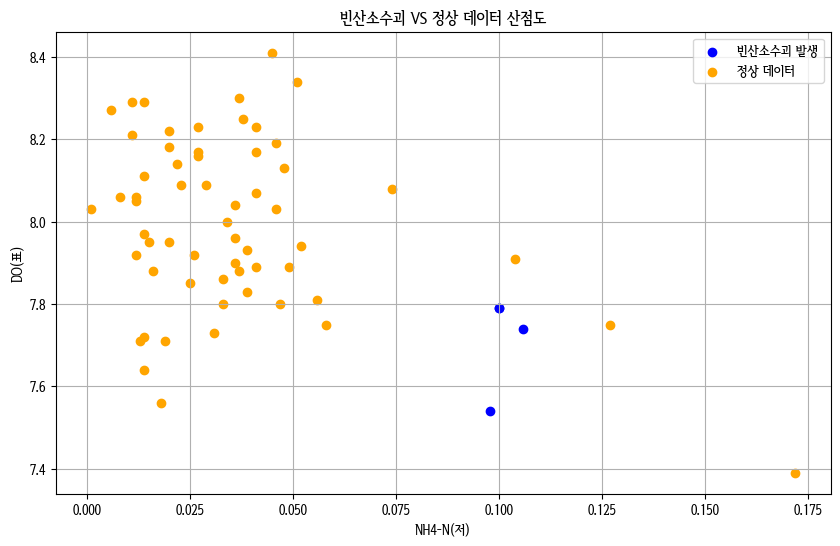

In [372]:
# 산점도 시각화 => 진해만 
plt.figure(figsize=(10, 6))
plt.scatter(df2진해만['NH4-N(저)'], df2진해만['Ph(저)'], color='blue', label='빈산소수괴 발생')
plt.scatter(df2_진해만['NH4-N(저)'], df2_진해만['Ph(저)'], color='orange', label='정상 데이터')
plt.xlabel('NH4-N(저)')
plt.ylabel('DO(표)')
plt.title('빈산소수괴 VS 정상 데이터 산점도')
plt.legend()
plt.grid(True)
plt.show()

In [373]:
df2 = df2[df2['어장명']=='진해만']
df2['정점']

227      26
235      12
237      15
516       4
518       6
         ..
15989     5
15992     8
15993     9
16522     9
16529    21
Name: 정점, Length: 345, dtype: int64

#folium으로 정점 찍기

In [374]:
import folium

In [375]:
df2.head()

,어장명,정점,위도,위도_,경도,경도_,어장종류,년도,월,일,...,NO3-N(저),NO2-N(저),DIN(저),TN(저),DIP(저),TP(저),SIO2-SI(저),CHL-A(저),SS(저),투명도
227,진해만,26,34.9769444444445,34.9769,128.601111111111,128.6011,굴/진주담치,2022,10,18,...,0.045,0.067,0.214,0.355,0.047,0.054,1.025,4.84,7.1,8.5
235,진해만,12,35.0288888888889,35.0289,128.5,128.5,굴/미더덕,2022,10,17,...,0.066,0.036,0.187,0.346,0.044,0.046,0.966,5.58,15.0,8.5
237,진해만,15,34.9861111111111,34.9861,128.4475,128.4475,굴,2022,10,17,...,0.040,0.022,0.136,0.309,0.029,0.037,0.697,5.79,11.9,7.0
516,진해만,4,35.0597222222222,35.0597,128.640833333333,128.6408,진주담치,2022,8,3,...,0.020,0.007,0.125,0.256,0.037,0.973,0.058,1.81,11.1,5.0
518,진해만,6,35.0216666666667,35.0217,128.633333333333,128.6333,굴/진주담치,2022,8,3,...,0.009,0.004,0.104,0.232,0.030,0.721,0.050,1.40,9.7,6.0


In [376]:
for i in range(df2.shape[0]):
  print(df2.iloc[i]['위도_'], df2.iloc[i]['경도_'] )

34.9769 128.6011
35.0289 128.5
34.9861 128.4475
35.0597 128.6408
35.0217 128.6333
34.9197 128.5619
34.9481 128.5631
34.9769 128.6011
35.0111 128.5608
35.0889 128.5272
35.0853 128.4825
35.0289 128.5
35.0111 128.5608
34.9839 128.4528
34.905 128.4325
34.9475 128.4958
34.9197 128.5619
34.9481 128.5631
34.9769 128.6011
34.9647 128.6467
35.0597 128.6408
35.0889 128.5272
35.0853 128.4825
35.0533 128.5161
35.0289 128.5
35.0111 128.5608
34.9839 128.4528
35.0042 128.6656
35.0217 128.6333
34.9475 128.4958
34.9183 128.5108
34.9197 128.5619
34.9481 128.5631
34.9769 128.6011
34.9647 128.6467
35.0889 128.5272
35.0853 128.4825
34.9839 128.4528
34.905 128.4325
34.9378 128.4675
34.9475 128.4958
34.9183 128.5108
34.9197 128.5619
35.0111 128.5608
34.9197 128.5619
34.9481 128.5631
34.9769 128.6011
34.9647 128.6467
35.0853 128.4825
35.0533 128.5161
34.9992 128.4939
34.9839 128.4528
34.9503 128.4456
34.9144 128.4567
34.905 128.4325
34.9378 128.4675
35.0889 128.5272
35.0853 128.4825
35.0533 128.5161
35.0289 1

In [392]:
m = folium.Map(
    location=[35.0211,128.6810],
    zoom_start=10
)

tooltip = 'Click'

# for문, f-string이용
for i in range(df2.shape[0]):
    folium.Marker(
        [df2.iloc[i]['위도'], df2.iloc[i]['경도']],
        popup = f'<strong>{df2.iloc[i]["어장명"]}</br>{df2.iloc[i]["정점"]}</strong>',
        tooltip = tooltip
    ).add_to(m)
m

In [395]:
import folium

m = folium.Map(
    location=[35.0211, 128.6810],
    zoom_start=10
)

tooltip = 'Click'

for i in range(df2.shape[0]):
    if df2.iloc[i]["어장명"] == "진해만" and df2.iloc[i]["정점"] == 22:
        folium.Marker(
            [df2.iloc[i]['위도'], df2.iloc[i]['경도']],
            popup=f'<strong>{df2.iloc[i]["어장명"]}</br>{df2.iloc[i]["정점"]}</strong>',
            tooltip=tooltip
        ).add_to(m)

m


In [396]:
import folium

m = folium.Map(
    location=[35.0211, 128.6810],
    zoom_start=10
)

tooltip = 'Click'

for i in range(df2.shape[0]):
    if df2.iloc[i]["어장명"] == "진해만" and df2.iloc[i]["정점"] == 21:
        folium.Marker(
            [df2.iloc[i]['위도'], df2.iloc[i]['경도']],
            popup=f'<strong>{df2.iloc[i]["어장명"]}</br>{df2.iloc[i]["정점"]}</strong>',
            tooltip=tooltip
        ).add_to(m)

m